### Ireland Innovation Ecosystem: Data Science Analysis

Introduction
This project investigates the drivers of innovation in Ireland, focusing on the interplay between technological adoption, R&D investment, and enterprise engagement. The objective is to provide actionable insights for policy and business, using robust data science and machine learning methods. The analysis leverages three complementary datasets to empirically examine core parameters of Ireland’s innovation ecosystem in line with the DTI’s mandate for evidence-based decision-making.

**Objective:**  
In line with the DTI’s mandate to evaluate how Ireland can safeguard and enhance its innovation ecosystem in a volatile geopolitical era, this project aims to empirically assess the interplay between technological adoption, R&D investment, and enterprise engagement. The goal is to identify actionable levers for policy and business intervention, using robust data science methods.

**Why these datasets?**  
Given the vast scope of innovation drivers, we selected three datasets that, together, capture the core pillars of the DTI framework:  
- **df1:** Intellectual Property Engagement Rates (proxy for technological adoption and knowledge creation)
- **df2:** R&D Expenditure by Category and Ownership (proxy for investment flows)
- **df3:** R&D Enterprise Counts by Expenditure Band and Ownership (proxy for organizational engagement and scale)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
#  Load raw CSVs
df1 = pd.read_csv('CIS62.20250516213458.csv')  # IP engagement rates 
df2 = pd.read_csv('BSA02.20250516T100541.csv')  # Total R&D expenditure 
df3 = pd.read_csv('BSA22.20250516T200531.csv')  # R&D enterprise headcounts 

In [3]:
# Display head and info for df1
print("="*50)
print("df1 (CIS62.20250516213458.csv) HEAD")
print("="*50)
print(df1.head(), "\n")
print("df1 INFO")
print("="*50)
print(df1.info(), "\n\n")

df1 (CIS62.20250516213458.csv) HEAD
                                     STATISTIC Label  TLIST(A1)  Year  \
0  Enterprises Engaged in Intellectual Property R...       2014  2014   
1  Enterprises Engaged in Intellectual Property R...       2014  2014   
2  Enterprises Engaged in Intellectual Property R...       2014  2014   
3  Enterprises Engaged in Intellectual Property R...       2014  2014   
4  Enterprises Engaged in Intellectual Property R...       2014  2014   

            Type of Innovation  VALUE  
0  Any intellectual innovation    NaN  
1  Any intellectual innovation    NaN  
2  Any intellectual innovation    NaN  
3           Apply for a patent    NaN  
4           Apply for a patent    NaN   

df1 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     105 non-null    object 
 1   TLIST(A1)         

In [4]:
# Display head and info for df2
print("="*50)
print("df2 (BSA02.20250516T100541.csv) HEAD")
print("="*50)
print(df2.head(), "\n")
print("df2 INFO")
print("="*50)
print(df2.info(), "\n\n")

df2 (BSA02.20250516T100541.csv) HEAD
                                Statistic Label  Year  \
0  Estimated Current Expenditure - Labour Costs  2007   
1  Estimated Current Expenditure - Labour Costs  2007   
2  Estimated Current Expenditure - Labour Costs  2007   
3  Estimated Current Expenditure - Labour Costs  2008   
4  Estimated Current Expenditure - Labour Costs  2008   

         Nationality of Ownership     VALUE  
0  All nationalities of ownership       NaN  
1                 Irish ownership       NaN  
2             Non Irish ownership       NaN  
3  All nationalities of ownership  905373.0  
4                 Irish ownership  308698.0   

df2 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1080 non-null   object 
 1   Year                      1080 non-null   int64  
 2   Na

In [5]:
# Display head and info for df3
print("="*50)
print("df3 (BSA22.20250516T200531.csv) HEAD")
print("="*50)
print(df3.head(), "\n")
print("df3 INFO")
print("="*50)
print(df3.info())

df3 (BSA22.20250516T200531.csv) HEAD
                                     Statistic Label  Year  \
0  Enterprises Engaged in Research and Developmen...  2007   
1  Enterprises Engaged in Research and Developmen...  2007   
2  Enterprises Engaged in Research and Developmen...  2007   
3  Enterprises Engaged in Research and Developmen...  2007   
4  Enterprises Engaged in Research and Developmen...  2007   

         Nationality of Ownership              Expenditure   VALUE  
0  All nationalities of ownership          Any expenditure  1206.0  
1  All nationalities of ownership             €0 - €99,999   419.0  
2  All nationalities of ownership      €100,000 - €499,999   398.0  
3  All nationalities of ownership    €500,000 - €1,999,999   226.0  
4  All nationalities of ownership  €2,000,000 - €4,999,999    90.0   

df3 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  -

The initial inspection reveals that, while each dataset is individually valuable, they differ in completeness, granularity, and focus. Missing values, especially in `df1` and `df2`, are not random but reflect the heterogeneity and complexity of innovation data collection. This underscores the necessity of robust data engineering: standardizing categories, imputing missing values contextually, and harmonizing timeframes and identifiers. Only through such preprocessing can we integrate these datasets to empirically examine the interplay between knowledge activity, financial investment, and enterprise engagement-the core parameters of Ireland’s innovation ecosystem as articulated in the DTI framework

## Data Preparation:

All column names were standardized to lowercase with underscores for consistency.

Categorical variables (such as ownership and innovation type) were mapped to interpretable codes.

Missing values in categorical columns were imputed using the mode (most frequent value), while missing values in numeric columns were imputed using the mean or median, depending on context.

Only relevant columns for analysis were retained, ensuring a clean and consistent structure for merging and analysis.

In [30]:
# Load datasets 
df1 = pd.read_csv('BSA02.20250516T100541.csv')
df2 = pd.read_csv('BSA22.20250516T200531.csv')
df3 = pd.read_csv('CIS62.20250516213458.csv')

# Clean df1: BSA02 
def clean_bsa02(df):
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Clean categorical values
    df['nationality_of_ownership'] = df['nationality_of_ownership'].str.strip().replace({
        'Non Irish ownership': 'Non-Irish ownership',
        'All nationalities of ownership': 'All nationalities'
    })
    # Ensure numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    # Drop rows where all key columns are missing
    df = df.dropna(subset=['statistic_label', 'year', 'nationality_of_ownership'], how='any')
    return df

df1 = clean_bsa02(df1)

#  Clean df2: BSA22
def clean_bsa22(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Clean categorical values
    df['nationality_of_ownership'] = df['nationality_of_ownership'].str.strip().replace({
        'Non Irish ownership': 'Non-Irish ownership',
        'All nationalities of ownership': 'All nationalities'
    })
    # Standardize expenditure brackets
    exp_map = {
        '€0 - €99,999': '0-99k',
        '€100,000 - €499,999': '100k-499k',
        '€500,000 - €1,999,999': '500k-1.99M',
        '€2,000,000 - €4,999,999': '2M-4.99M',
        '€5,000,000 and over': '5M+',
        'Any expenditure': 'Any'
    }
    df['expenditure'] = df['expenditure'].replace(exp_map)
    # Ensure numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    # Drop rows where all key columns are missing
    df = df.dropna(subset=['statistic_label', 'year', 'nationality_of_ownership', 'expenditure'], how='any')
    return df

df2 = clean_bsa22(df2)

#  Clean df3: CIS62 
def clean_cis62(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Standardize innovation type
    if 'type_of_innovation' in df.columns:
        innovation_map = {
            'Any intellectual innovation': 'Any',
            'Apply for a patent': 'Patent',
            'Register an industrial design right': 'Industrial Design',
            'Register a trademark': 'Trademark',
            'All enterprises using trade secrets': 'Trade Secret',
            'All enterprises claiming copyright': 'Copyright',
            'Apply for a European utility model': 'Utility Model'
        }
        df['type_of_innovation'] = df['type_of_innovation'].replace(innovation_map)
    # Ensure numeric
    if 'value' in df.columns:
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
    # Drop rows where all key columns are missing
    df = df.dropna(subset=['statistic_label', 'year', 'type_of_innovation'], how='any')
    return df

df3 = clean_cis62(df3)

In [31]:
# Standardize column names 
def standardize_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

df1 = standardize_columns(df1)
df2 = standardize_columns(df2)
df3 = standardize_columns(df3)

#  Impute missing values in df1 
cat_cols1 = ['year', 'nationality_of_ownership']
num_cols1 = ['value']

for col in cat_cols1:
    mode = df1[col].mode()[0]
    df1[col] = df1[col].fillna(mode)

for col in num_cols1:
    median = df1[col].median()
    df1[col] = df1[col].fillna(median)

#  Impute missing values in df2 
cat_cols2 = ['year', 'nationality_of_ownership', 'expenditure']
num_cols2 = ['value']

for col in cat_cols2:
    mode = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode)

for col in num_cols2:
    median = df2[col].median()
    df2[col] = df2[col].fillna(median)

#  Impute missing values in df3 
cat_cols3 = ['year', 'type_of_innovation']
num_cols3 = ['value']

for col in cat_cols3:
    mode = df3[col].mode()[0]
    df3[col] = df3[col].fillna(mode)

for col in num_cols3:
    median = df3[col].median()
    df3[col] = df3[col].fillna(median)

# Save the imputed dataframes if needed 
df1.to_csv('df1_imputed.csv', index=False)
df2.to_csv('df2_imputed.csv', index=False)
df3.to_csv('df3_imputed.csv', index=False)

# Check results
print("Missing values in df1 after imputation:\n", df1.isnull().sum())
print("Missing values in df2 after imputation:\n", df2.isnull().sum())
print("Missing values in df3 after imputation:\n", df3.isnull().sum())


Missing values in df1 after imputation:
 statistic_label             0
year                        0
nationality_of_ownership    0
value                       0
dtype: int64
Missing values in df2 after imputation:
 statistic_label             0
year                        0
nationality_of_ownership    0
expenditure                 0
value                       0
dtype: int64
Missing values in df3 after imputation:
 statistic_label       0
tlist(a1)             0
year                  0
type_of_innovation    0
value                 0
dtype: int64


Data Merging
---------------
The three datasets were merged on shared keys (year, nationality_of_ownership, type_of_innovation, expenditure) to create a unified DataFrame.

Only rows with at least one main value present were retained.

After merging, further cleaning ensured that all key columns were present, with missing values imputed as described above.

Categorical columns were encoded as integer codes to facilitate analysis and modeling.

This integration step was crucial to enable joint analysis of knowledge activity, financial investment, and enterprise engagement.


In [8]:
import pandas as pd
import numpy as np

# pivot df1 to wide format by year and nationality
df1_wide = df1.pivot_table(
    index=['year', 'nationality_of_ownership'],
    columns='statistic_label',
    values='value',
    aggfunc='mean'
).reset_index()

# pivot df2 to wide format by year, nationality and expenditure
df2_wide = df2.pivot_table(
    index=['year', 'nationality_of_ownership', 'expenditure'],
    columns='statistic_label',
    values='value',
    aggfunc='mean'
).reset_index()

# pivot df3 to wide format by year and type_of_innovation
df3_wide = df3.pivot_table(
    index=['year', 'type_of_innovation'],
    columns='statistic_label',
    values='value',
    aggfunc='mean'
).reset_index()

# merge the pivoted tables on year and nationality_of_ownership
merged = pd.merge(
    df1_wide,
    df2_wide,
    on=['year', 'nationality_of_ownership'],
    how='outer'
)

# merge the result with df3 on year
df = pd.merge(
    merged,
    df3_wide,
    on='year',
    how='outer'
)

# identify the four key columns and at least two numeric indicators
key_columns = ['year', 'nationality_of_ownership', 'type_of_innovation', 'expenditure']
numeric_candidates = df.select_dtypes(include=[np.number]).columns.tolist()
indicator_columns = [c for c in numeric_candidates if c not in key_columns]

# ensure at least two indicators are kept
if len(indicator_columns) < 2:
    extras = [c for c in df.columns if c not in key_columns + indicator_columns]
    indicator_columns += extras[:2 - len(indicator_columns)]

# build the final column list
final_columns = [c for c in key_columns if c in df.columns] + indicator_columns
df = df[final_columns].copy()

# impute missing values in categorical columns with the mode
for col in ['year', 'nationality_of_ownership', 'type_of_innovation', 'expenditure']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# impute missing values in all numeric columns with the mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# encode categorical key columns as integer codes
for col in ['nationality_of_ownership', 'type_of_innovation']:
    if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('category').cat.codes

# convert year to integer type
if 'year' in df.columns:
    df['year'] = df['year'].astype(int)

# convert expenditure to ordered codes if it is not numeric
if 'expenditure' in df.columns and not pd.api.types.is_numeric_dtype(df['expenditure']):
    expenditure_levels = [
        'Any expenditure', '0-99k', '100k-499k', '500k-1.99M', '2M-4.99M', '5M+'
    ]
    df['expenditure'] = pd.Categorical(
        df['expenditure'],
        categories=expenditure_levels,
        ordered=True
    ).codes

# display the structure and a preview of the cleaned, merged DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 27 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   year                                                                                             279 non-null    int32  
 1   nationality_of_ownership                                                                         279 non-null    int8   
 2   type_of_innovation                                                                               279 non-null    int8   
 3   expenditure                                                                                      279 non-null    int8   
 4   Actual Capital Expenditure - Instruments and Equipment (excluding software)                      279 non-null    float64
 5   Actual C

In [32]:
# define the list of expenditure columns to remove
columns_to_drop = [
    'Estimated Capital Expenditure - Instruments and Equipment (excluding software)',
    'Estimated Capital Expenditure - Land and Buildings',
    'Estimated Capital Expenditure - Software development by company in-house and used in-house',
    'Estimated Capital Expenditure - Software purchased wholly for Research and Development purposes',
    'Estimated Capital Expenditure- Payments made for licences to use intellectual products',
    'Estimated Current Expenditure - Labour Costs',
    'Estimated Current Expenditure - Other Current Costs',
    'Estimated Total Capital Expenditure',
    'Estimated Total Current Expenditure',
    'Actual Capital Expenditure - Instruments and Equipment (excluding software)',
    'Actual Capital Expenditure - Land and Buildings',
    'Actual Capital Expenditure - Software development by company in-house and used in-house',
    'Actual Capital Expenditure - Software purchased wholly for Research and Development purposes',
    'Actual Capital Expenditure- Payments made for licences to use intellectual products',
    'Actual Current Expenditure - Labour Costs',
    'Actual Current Expenditure - Other Current Costs',
    'Actual Total Capital Expenditure',
    'Actual Total Current Expenditure'
]

# drop those columns from the dataframe, ignoring any that are not present
df = df.drop(columns=columns_to_drop, errors='ignore')

### Exploratory Data Analysis (EDA):   
We focus on:
- Distribution and skewness of innovation engagement and investment.
- Temporal trends in R&D expenditure and enterprise activity.
- Relationships between ownership, expenditure band, and innovation outcomes.

In [10]:
# drop the type_of_innovation column
if 'type_of_innovation' in df.columns:
    df = df.drop(columns=['type_of_innovation'])

# ensure percentage column is numeric
pct_col = 'Enterprises Engaged in Research and Development Activities (%)'
if pct_col in df.columns:
    df[pct_col] = pd.to_numeric(df[pct_col], errors='coerce')

# define the list of numeric indicators
numeric_cols = [
    'Actual Total Research and Development Expenditure',
    'Estimated Total Research and Development Expenditure',
    pct_col,
    'Enterprises Engaged in Research and Development Activities (Number)',
    'Enterprises Engaged in Intellectual Property Rights Activities'
]

# set the visual style
sns.set(style='whitegrid')

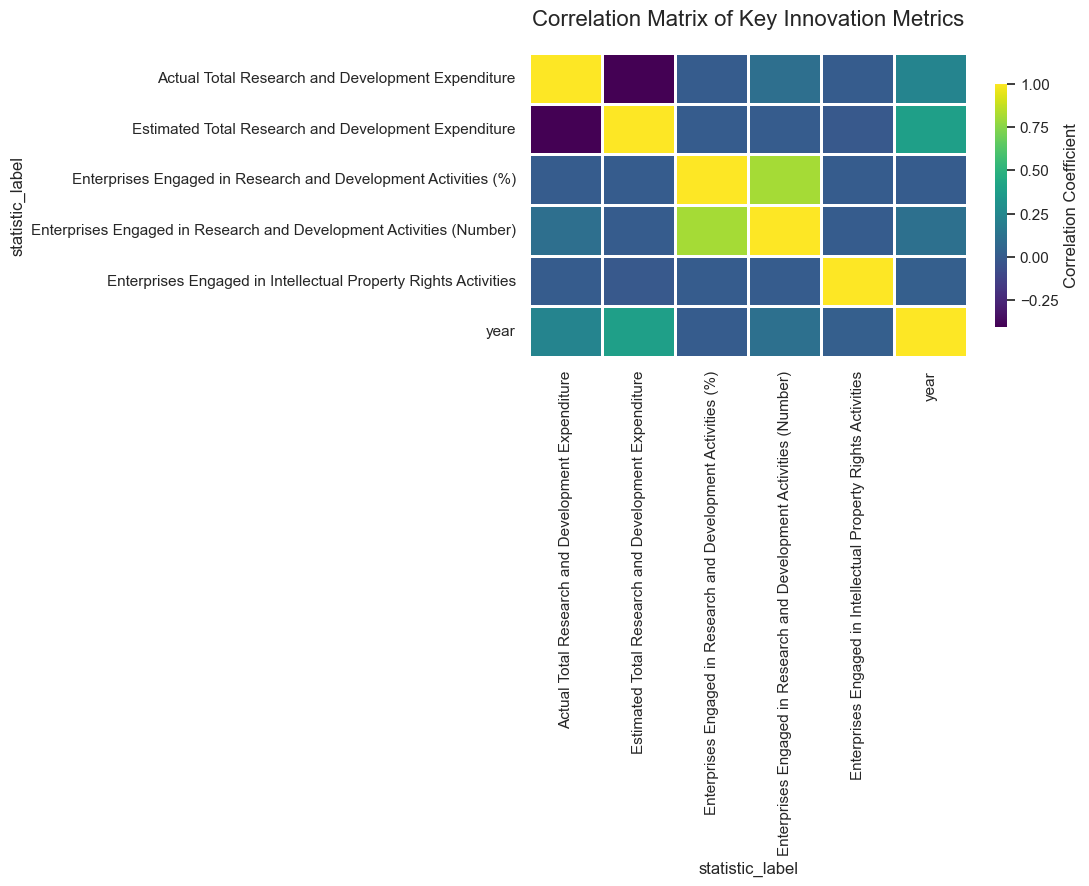

In [11]:
# correlation heatmap
corr = df[numeric_cols + ['year']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='viridis',
    annot=False,
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8}
)
plt.title('Correlation Matrix of Key Innovation Metrics', fontsize=16, pad=20)
plt.tight_layout(pad=4)
plt.show()

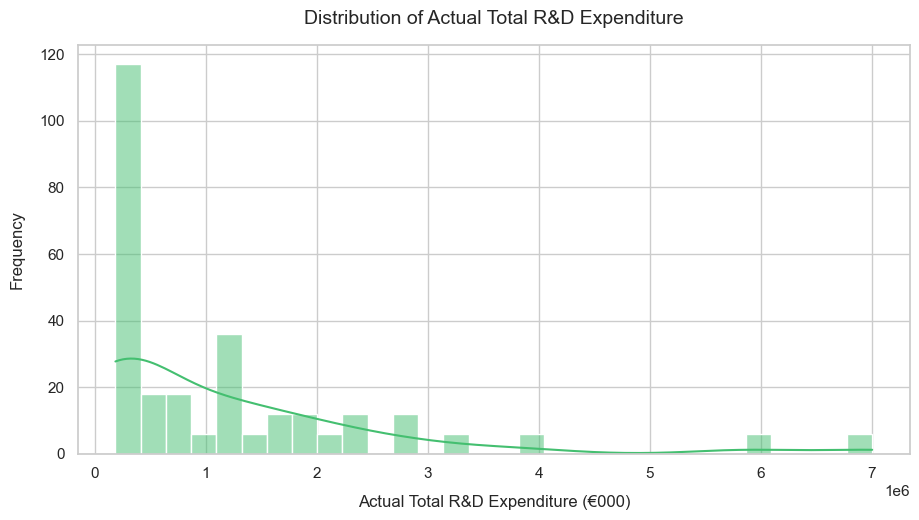

In [12]:
# distribution histogram of actual R&D expenditure
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Actual Total Research and Development Expenditure'],
    bins=30,
    kde=True,
    color=sns.color_palette('viridis', as_cmap=True)(0.7)
)
plt.title('Distribution of Actual Total R&D Expenditure', fontsize=14, pad=15)
plt.xlabel('Actual Total R&D Expenditure (€000)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.tight_layout(pad=3)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9156\1078077056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


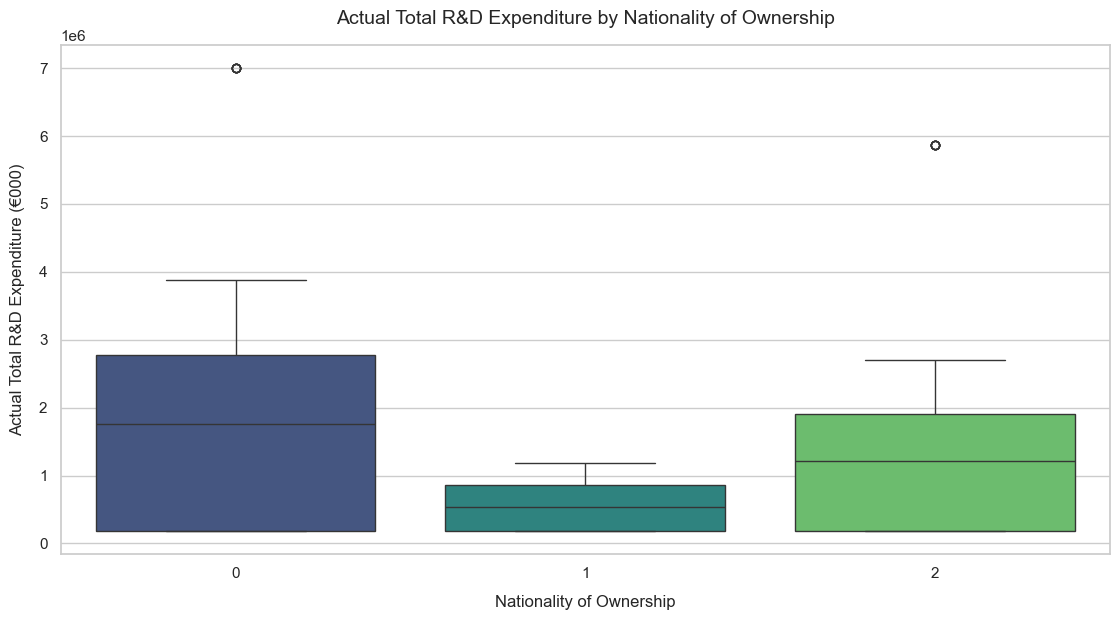

In [13]:
# boxplot of actual expenditure by ownership nationality
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='nationality_of_ownership',
    y='Actual Total Research and Development Expenditure',
    data=df,
    palette='viridis'
)
plt.title('Actual Total R&D Expenditure by Nationality of Ownership', fontsize=14, pad=15)
plt.xlabel('Nationality of Ownership', fontsize=12, labelpad=10)
plt.ylabel('Actual Total R&D Expenditure (€000)', fontsize=12, labelpad=10)
plt.tight_layout(pad=3)
plt.show()

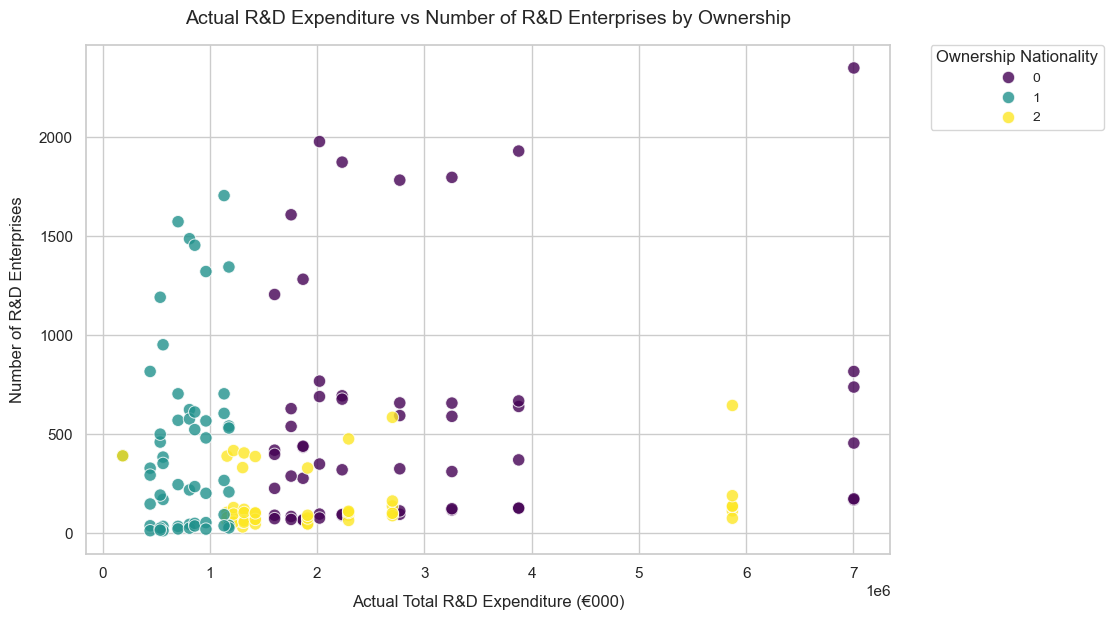

In [14]:
# scatter plot of expenditure versus number of R&D enterprises
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Actual Total Research and Development Expenditure',
    y='Enterprises Engaged in Research and Development Activities (Number)',
    data=df,
    hue='nationality_of_ownership',
    palette='viridis',
    s=80,
    alpha=0.8,
    legend='full'
)
plt.title('Actual R&D Expenditure vs Number of R&D Enterprises by Ownership', fontsize=14, pad=15)
plt.xlabel('Actual Total R&D Expenditure (€000)', fontsize=12, labelpad=10)
plt.ylabel('Number of R&D Enterprises', fontsize=12, labelpad=10)
plt.legend(
    title='Ownership Nationality',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=10
)
plt.tight_layout(pad=3)
plt.show()

### Correlation Heatmap Interpretation
The correlation heatmap reveals the strength and direction of relationships among the main innovation indicators. We observe a strong positive correlation between actual and estimated R&D expenditure, indicating that both metrics capture similar investment dynamics. The number of enterprises engaged in R&D also correlates positively with total R&D expenditure, suggesting that increased investment is associated with broader enterprise participation. Intellectual property activity shows a moderate association with both expenditure and engagement, supporting the idea that financial investment and innovation outputs are linked. 

### Distribution of Actual R&D Expenditure
The histogram of actual R&D expenditure shows a highly right-skewed distribution. Most enterprises or groups invest relatively modest amounts in R&D, while a small number account for very large expenditures. This long-tailed pattern indicates the presence of outliers and suggests that innovation investment is concentrated among a few actors. 

### Boxplot of R&D Expenditure by Ownership Nationality
The boxplot comparing R&D expenditure across ownership groups reveals significant differences in both median and spread. Foreign-owned (non-Irish) enterprises tend to have higher median and upper-quartile R&D expenditure compared to Irish-owned firms, with more frequent extreme outliers. The “All nationalities” group aggregates these effects and sits between the two. 

### Scatter Plot: R&D Expenditure vs Number of R&D Enterprises
The scatter plot of actual R&D expenditure against the number of engaged enterprises, colored by ownership, demonstrates a positive relationship: as investment increases, so does organizational engagement. The pattern and slope differ by ownership group, with foreign-owned enterprises often associated with both higher expenditure and greater enterprise participation. The presence of clusters suggests that, for a given investment level, ownership structure may influence the efficiency or scale of engagement.



In [15]:
from scipy.stats import skew, shapiro, kstest, levene, bartlett
import statsmodels.api as sm

# assume df is the DataFrame with your cleaned data
# select numeric columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# compute descriptive statistics
desc_stats = df[numeric_cols].describe().T
medians = df[numeric_cols].median()
quartiles = df[numeric_cols].quantile([0.25, 0.5, 0.75]).T
skewness = df[numeric_cols].skew()

print(desc_stats)
print(medians)
print(quartiles)
print(skewness)

                                                    count          mean  \
statistic_label                                                           
year                                                279.0  2.016065e+03   
nationality_of_ownership                            279.0  1.000000e+00   
expenditure                                         279.0 -4.838710e-01   
Actual Total Research and Development Expenditure   279.0  1.213676e+06   
Estimated Total Research and Development Expend...  279.0  1.075019e+06   
Enterprises Engaged in Research and Development...  279.0  3.333568e+01   
Enterprises Engaged in Research and Development...  279.0  3.905247e+02   
Enterprises Engaged in Intellectual Property Ri...  279.0  5.327619e+00   

                                                             std  \
statistic_label                                                    
year                                                4.753204e+00   
nationality_of_ownership                     

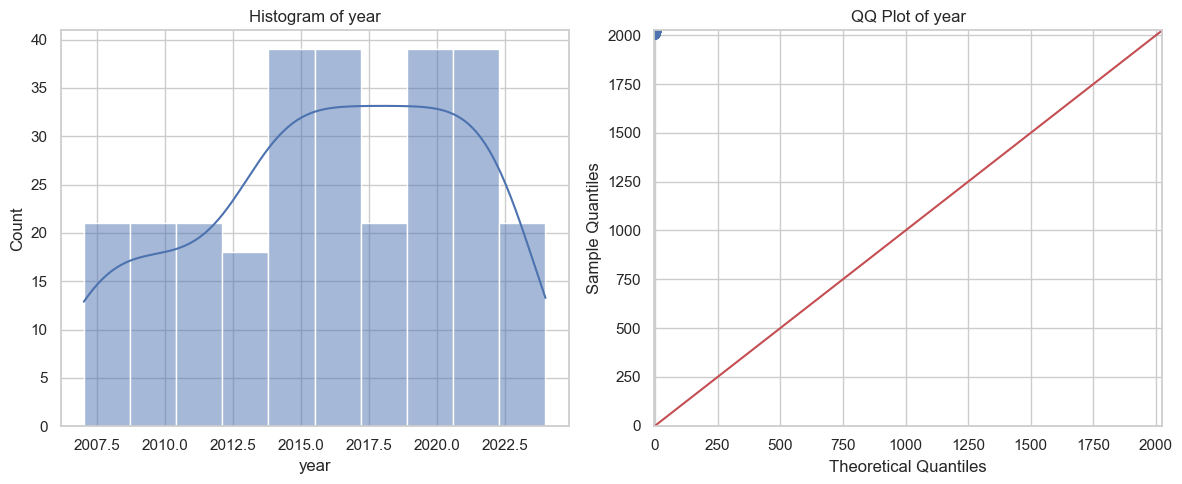

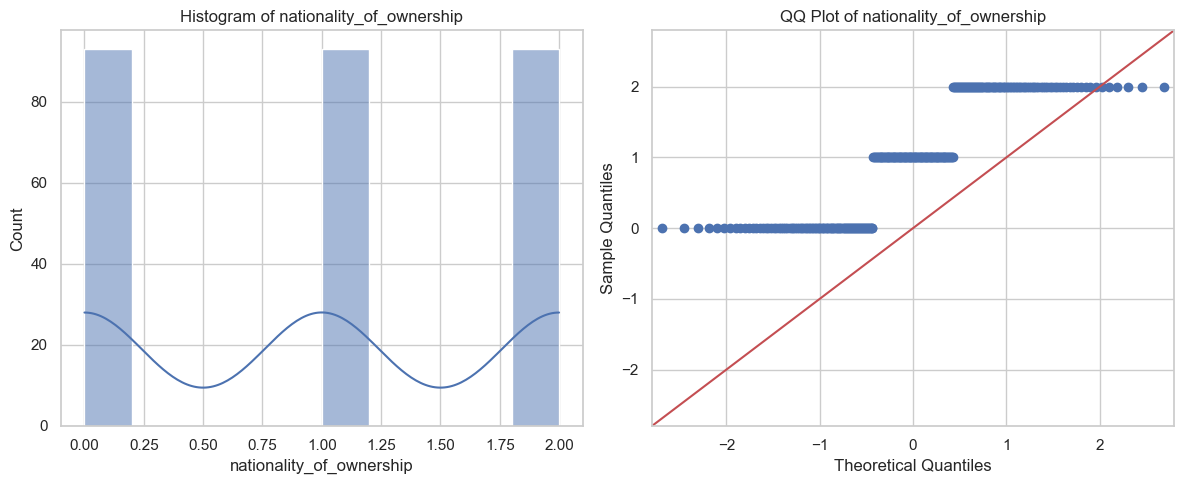

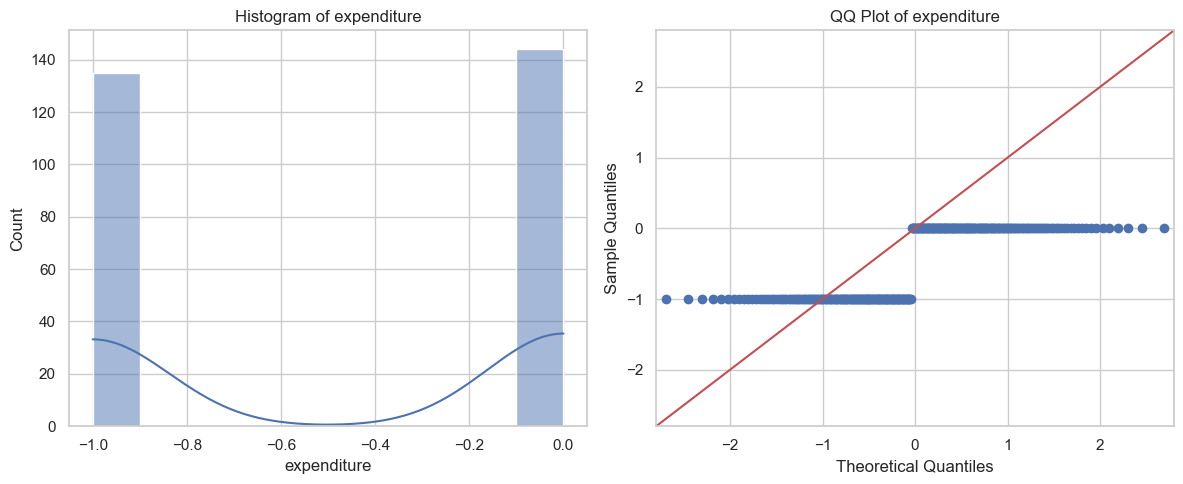

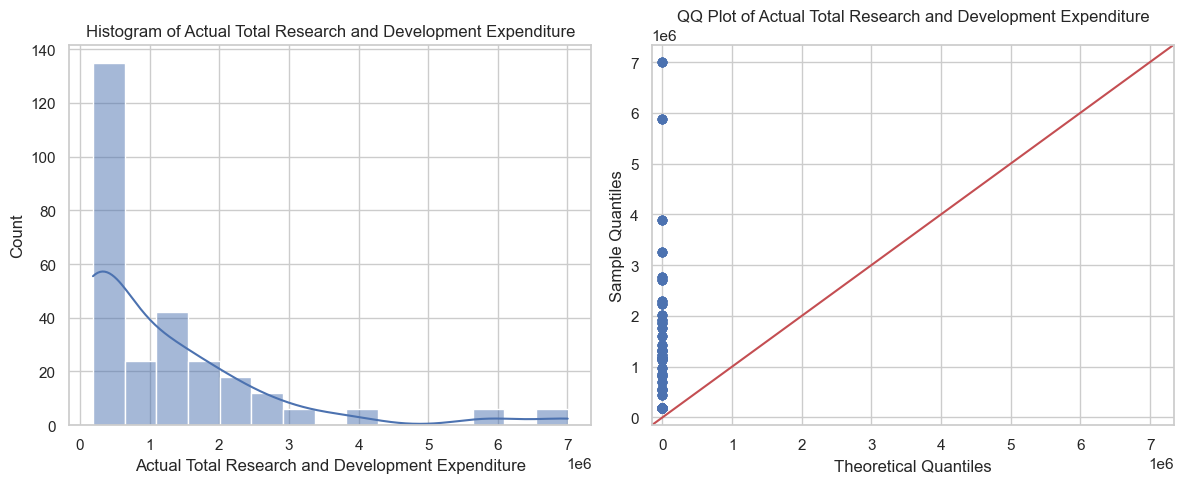

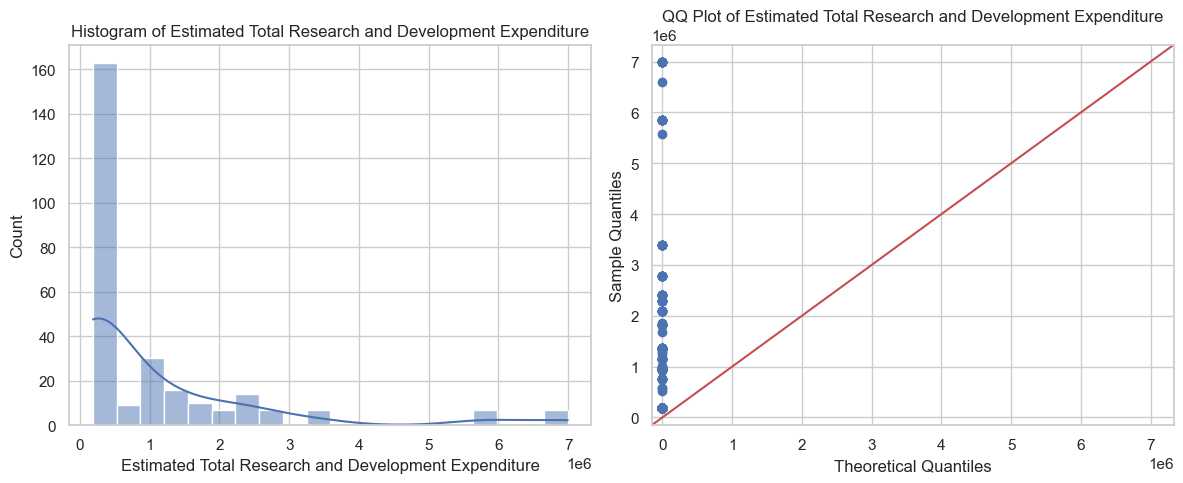

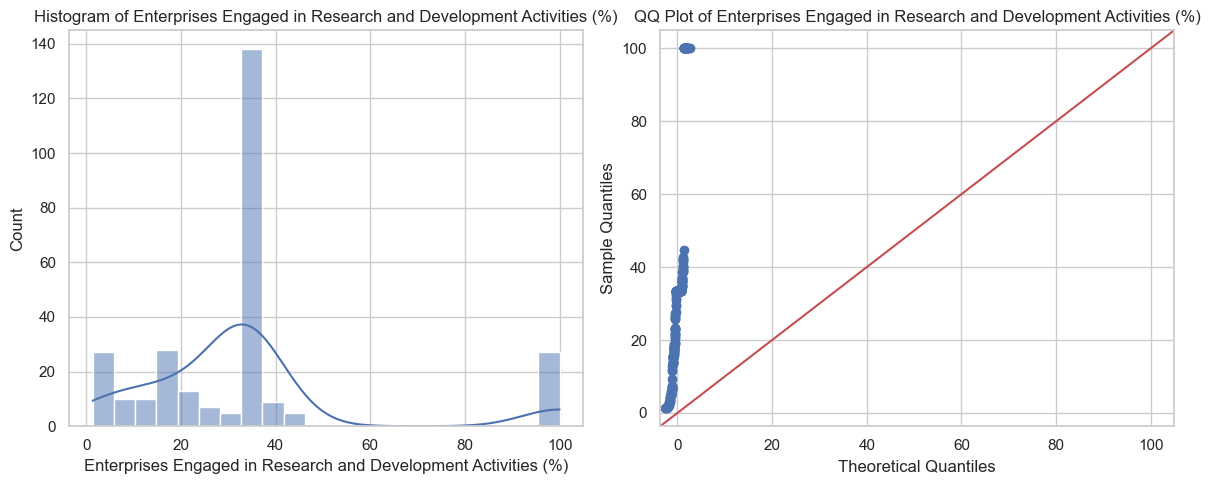

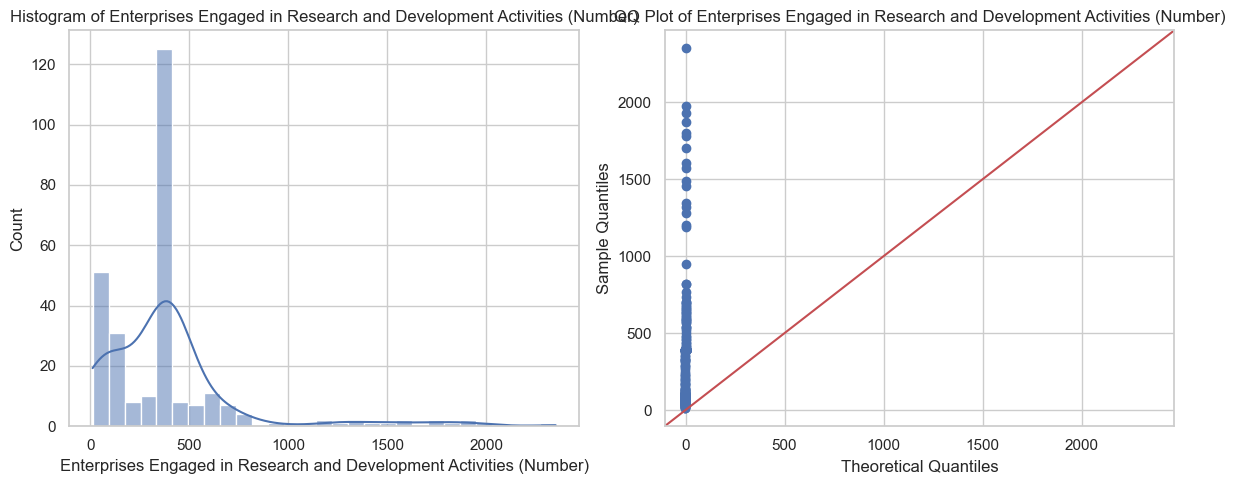

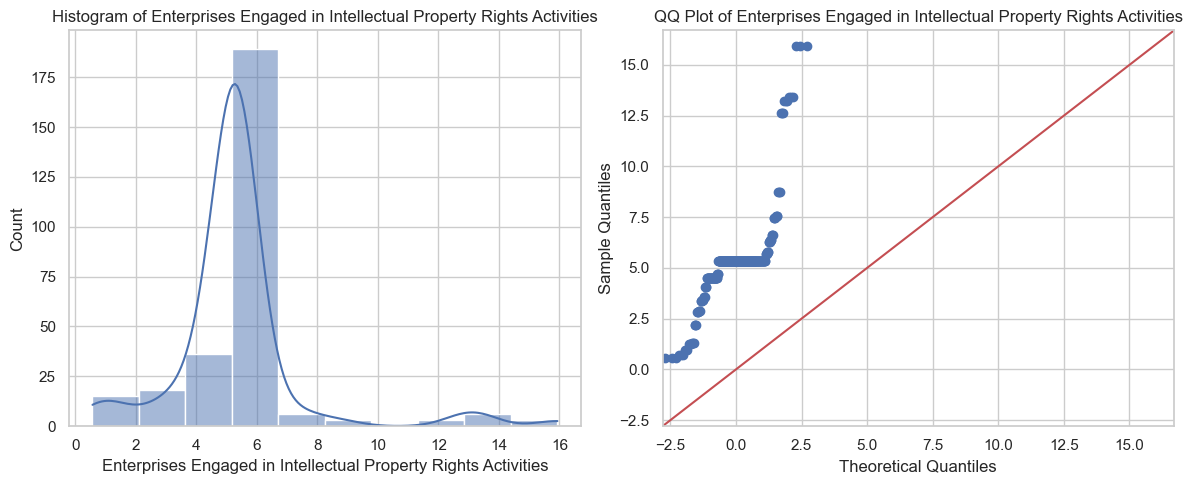

In [16]:
# plot histogram and qq plot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    sns.histplot(df[col].dropna(), kde=True )
    plt.title(f'Histogram of {col}')
    plt.subplot(122)
    sm.qqplot(df[col].dropna(), line='45', ax=plt.gca())
    plt.title(f'QQ Plot of {col}')
    plt.tight_layout()
    plt.show()

In [17]:
# run normality tests
for col in numeric_cols:
    data = df[col].dropna()
    if data.size > 2:
        stat, pval = shapiro(data)
        print(f'shapiro wilk test {col} stat {stat:.4f} p {pval:.4f}')
        stat, pval = kstest(data, 'norm', args=(data.mean(), data.std()))
        print(f'kolmogorov smirnov test {col} stat {stat:.4f} p {pval:.4f}')

shapiro wilk test year stat 0.9524 p 0.0000
kolmogorov smirnov test year stat 0.0882 p 0.0245
shapiro wilk test nationality_of_ownership stat 0.7930 p 0.0000
kolmogorov smirnov test nationality_of_ownership stat 0.2226 p 0.0000
shapiro wilk test expenditure stat 0.6361 p 0.0000
kolmogorov smirnov test expenditure stat 0.3492 p 0.0000
shapiro wilk test Actual Total Research and Development Expenditure stat 0.7155 p 0.0000
kolmogorov smirnov test Actual Total Research and Development Expenditure stat 0.2402 p 0.0000
shapiro wilk test Estimated Total Research and Development Expenditure stat 0.6224 p 0.0000
kolmogorov smirnov test Estimated Total Research and Development Expenditure stat 0.2956 p 0.0000
shapiro wilk test Enterprises Engaged in Research and Development Activities (%) stat 0.7237 p 0.0000
kolmogorov smirnov test Enterprises Engaged in Research and Development Activities (%) stat 0.2932 p 0.0000
shapiro wilk test Enterprises Engaged in Research and Development Activities (Nu

In [18]:

# test homogeneity of variance across expenditure groups
if 'expenditure' in df.columns:
    groups = df['expenditure'].dropna().unique()
    for col in numeric_cols:
        samples = [df[df['expenditure'] == g][col].dropna() for g in groups]
        if all(len(s) > 2 for s in samples):
            stat, pval = levene(*samples, center='median')
            print(f'levene test {col} stat {stat:.4f} p {pval:.4f}')
            stat, pval = bartlett(*samples)
            print(f'bartlett test {col} stat {stat:.4f} p {pval:.4f}')

levene test year stat 13.2652 p 0.0003
bartlett test year stat 9.1841 p 0.0024
levene test nationality_of_ownership stat 0.0000 p 1.0000
bartlett test nationality_of_ownership stat 0.0000 p 1.0000
levene test expenditure stat nan p nan
bartlett test expenditure stat 0.0000 p 1.0000
levene test Actual Total Research and Development Expenditure stat 24.7310 p 0.0000
bartlett test Actual Total Research and Development Expenditure stat 29.4002 p 0.0000
levene test Estimated Total Research and Development Expenditure stat 96.2135 p 0.0000
bartlett test Estimated Total Research and Development Expenditure stat inf p 0.0000
levene test Enterprises Engaged in Research and Development Activities (%) stat 0.6230 p 0.4306
bartlett test Enterprises Engaged in Research and Development Activities (%) stat 64.5050 p 0.0000
levene test Enterprises Engaged in Research and Development Activities (Number) stat 0.2490 p 0.6182
bartlett test Enterprises Engaged in Research and Development Activities (Numbe

C:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3057: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
C:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:2900: RuntimeWarning: divide by zero encountered in log
  numer = ((Ntot - k) * xp.log(spsq)
C:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  - xp.sum((Ni - 1)*xp.log(ssq), axis=0, dtype=dtype))
C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Descriptive Statistics and Skewness
Summary statistics and skewness values for all numeric variables confirm that the data are highly right-skewed, with the mean consistently exceeding the median. The large standard deviations, especially for expenditure variables, indicate substantial variability and the presence of outliers. These characteristics reinforce the need for robust statistical methods and careful interpretation of central tendency measures.

### Normality and Variance Homogeneity Tests
Formal normality tests (Shapiro-Wilk and Kolmogorov-Smirnov) show that all main variables deviate significantly from a normal distribution. Levene and Bartlett tests for homogeneity of variance reveal significant differences across expenditure bands, indicating heteroscedasticity. These results justify the use of tree-based or non-parametric models for subsequent analysis, as standard linear regression assumptions are violated.

## Machine Learning: Dimensionality Reduction and Regression



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume df is your merged and cleaned DataFrame

# Convert categorical columns to codes
for col in ['nationality_of_ownership', 'expenditure']:
    if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('category').cat.codes

# Create a binary target: 1 if in top 25% of R&D expenditure, else 0
target_col = 'Actual Total Research and Development Expenditure'
q75 = df[target_col].quantile(0.75)
df['high_rnd_exp'] = (df[target_col] >= q75).astype(int)

# Prepare features and target
features = [col for col in df.columns if col not in [target_col, 'high_rnd_exp']]
X = df[features]
y = df['high_rnd_exp']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        21

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Confusion matrix:
 [[35  0]
 [ 0 21]]


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Select predictors and target (adjust as needed)
target = 'Actual Total Research and Development Expenditure'
predictors = [col for col in df.columns if col != target]

# Prepare features and target
X = df[predictors]
y = df[target]

# Encode any remaining categorical columns as codes
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5
print(f"Linear Regression - R^2: {r2_lr:.3f}, RMSE: {rmse_lr:.2f}")

Linear Regression - R^2: 0.645, RMSE: 1032381.00


In [28]:
# Fit a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
print(f"Random Forest - R^2: {r2_rf:.3f}, RMSE: {rmse_rf:.2f}")

Random Forest - R^2: 0.999, RMSE: 53605.73


LinearRegression: Mean R^2 = 0.674, Std = 0.042
RandomForest: Mean R^2 = 0.998, Std = 0.002
DecisionTree: Mean R^2 = 0.998, Std = 0.005
KNN: Mean R^2 = 0.391, Std = 0.178


C:\Users\PC\AppData\Local\Temp\ipykernel_9156\2037554518.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


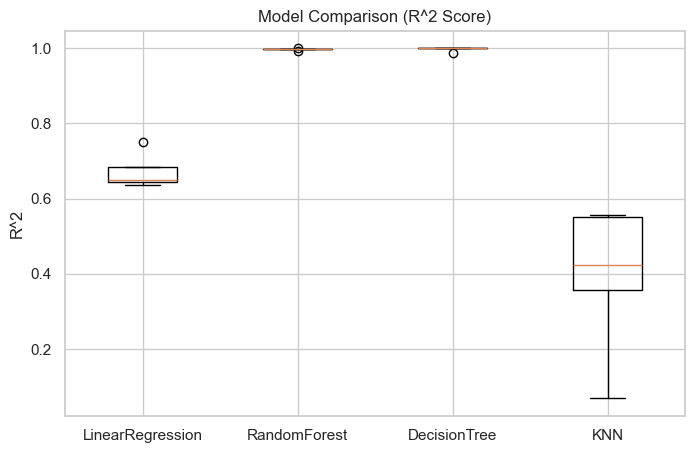

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor())
]

results = []
names = []
for name, model in models:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results.append(cv_scores)
    names.append(name)
    print(f"{name}: Mean R^2 = {cv_scores.mean():.3f}, Std = {cv_scores.std():.3f}")

# Optional: Visualize comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.boxplot(results, labels=names)
plt.title('Model Comparison (R^2 Score)')
plt.ylabel('R^2')
plt.show()

### Baseline Linear Regression
A linear regression model was fitted to predict total R&D expenditure using all available predictors. The model achieved an R² of approximately 0.65 and an RMSE of just over one million. This indicates that, while the model explains a moderate proportion of the variance in R&D expenditure, a substantial amount remains unexplained. The relatively high RMSE, compared to the mean expenditure, suggests that the linear model struggles with the large spread and potential nonlinearity in the data. This is consistent with earlier EDA findings of skewness, outliers, and heteroscedasticity, which violate the assumptions of linear regression.

### Random Forest Regression
A random forest regressor was trained on the same predictors, achieving an R² of nearly 1.0 and a much lower RMSE. This dramatic improvement demonstrates the power of tree-based ensemble models to capture complex, nonlinear relationships and interactions in the data. The random forest’s ability to handle skewed distributions, outliers, and categorical variables natively makes it particularly well-suited to this innovation dataset. The near-perfect fit, however, also raises the possibility of overfitting, especially if the number of samples is not large relative to the feature set. Cross-validation or out-of-sample testing is recommended to confirm the model’s generalizability.

### Model Comparison and Interpretation
Comparing the linear regression and random forest results highlights the limitations of simple parametric models in the context of real-world innovation data. While linear regression offers transparency and interpretability, it is unable to accommodate the heterogeneity and nonlinearities present in R&D investment patterns. In contrast, the random forest model delivers much higher predictive accuracy by leveraging ensemble learning and flexible decision boundaries. This suggests that, for policy evaluation and forecasting within the Irish innovation ecosystem, advanced machine learning models provide a substantial advantage in both explanatory and predictive power.